# **X DATA SENTIMENTAL ANALYSIS**

**VADER SENTIMENTAL ANALYSIS**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')


def preprocess_sentiment_dataset(df, text_column='clean_text', label_column='category'):
    basic_stopwords = {
        'the', 'is', 'in', 'it', 'of', 'and', 'to', 'a', 'an', 'this', 'that', 'on',
        'for', 'with', 'as', 'was', 'are', 'by', 'at', 'be', 'from', 'or', 'has',
        'have', 'had'
    }

    def basic_preprocess(text):
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in basic_stopwords]
        return ' '.join(tokens)

    df = df.dropna(subset=[text_column, label_column]).copy()
    df[label_column] = df[label_column].astype(int)
    df['processed_text'] = df[text_column].apply(basic_preprocess)

    return df

def add_vader_scores(df, text_column='processed_text'):
    sia = SentimentIntensityAnalyzer()

    df['vader_compound'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    df['vader_pos'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['pos'])
    df['vader_neu'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['neu'])
    df['vader_neg'] = df[text_column].apply(lambda x: sia.polarity_scores(str(x))['neg'])

    return df

def classify_sentiment(compound):
    if compound >= 0.05:
        return 1
    elif compound <= -0.05:
        return -1
    else:
        return 0


df = pd.read_csv("X data.csv")
df_processed = preprocess_sentiment_dataset(df)
df_vader = add_vader_scores(df_processed)
df_vader['predicted_sentiment'] = df_vader['vader_compound'].apply(classify_sentiment)
print(df_vader[['clean_text', 'processed_text', 'category', 'vader_compound', 'predicted_sentiment']].head())
sentiment_counts = df_vader['predicted_sentiment'].value_counts().sort_index()
print("\nSentiment Distribution (Predicted):")
print(f"Negative (-1): {sentiment_counts.get(-1, 0)}")
print(f"Neutral  (0) : {sentiment_counts.get(0, 0)}")
print(f"Positive (1) : {sentiment_counts.get(1, 0)}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                      processed_text  category  \
0  when modi promised minimum government maximum ...        -1   
1  talk all nonsense continue all drama will vote...         0   
2  what did just say vote modi welcome bjp told y...         1   
3  asking his supporters prefix chowkidar their n...         1   
4  answer who among these most powerful world lea...         1   

   vader_compound  predicted_sentiment  
0          0.5267                    1  
1         -0.4019                   -1  
2          0.7096                    1  
3         -0.0713                   -1  
4          0.4754                    1  

Sentiment Distribut

**PLOTS SHOWING DISTRIBUTIONS**

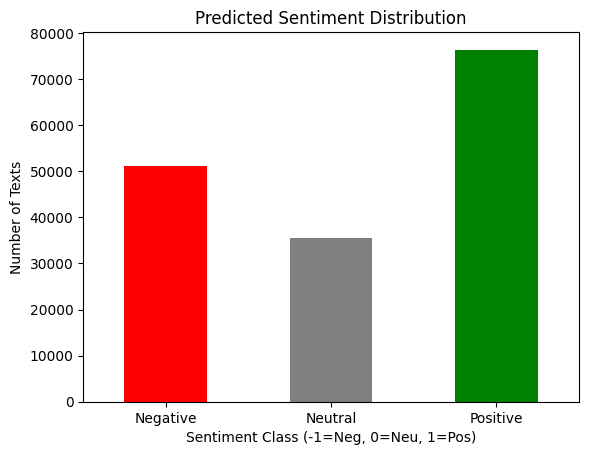

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df_vader['predicted_sentiment'].value_counts().sort_index()
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment Class (-1=Neg, 0=Neu, 1=Pos)")
plt.ylabel("Number of Texts")
plt.xticks(ticks=[0, 1, 2], labels=["Negative", "Neutral", "Positive"], rotation=0)
plt.show()


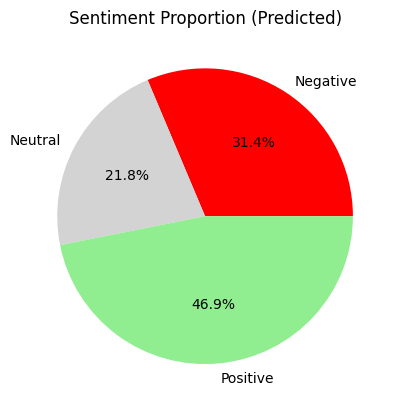

In [ ]:
plt.pie([sentiment_counts.get(-1, 0), sentiment_counts.get(0, 0), sentiment_counts.get(1, 0)],
        labels=['Negative', 'Neutral', 'Positive'],
        autopct='%1.1f%%',
        colors=['red', 'lightgrey', 'lightgreen'])
plt.title("Sentiment Proportion (Predicted)")
plt.show()


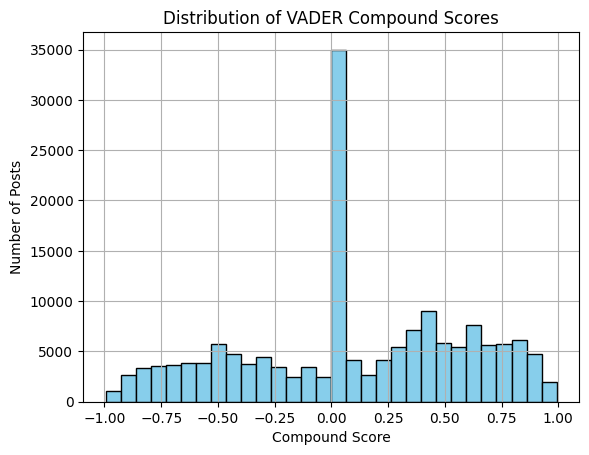

In [ ]:
plt.hist(df_vader['vader_compound'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of VADER Compound Scores")
plt.xlabel("Compound Score")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.show()

**LOGISTIC REGRESSION ML ALGORITHM**

 Accuracy: 0.8365036509787077

 Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.75      0.79     10267
           0       0.81      0.88      0.84      6984
           1       0.86      0.87      0.87     15343

    accuracy                           0.84     32594
   macro avg       0.83      0.84      0.83     32594
weighted avg       0.84      0.84      0.84     32594



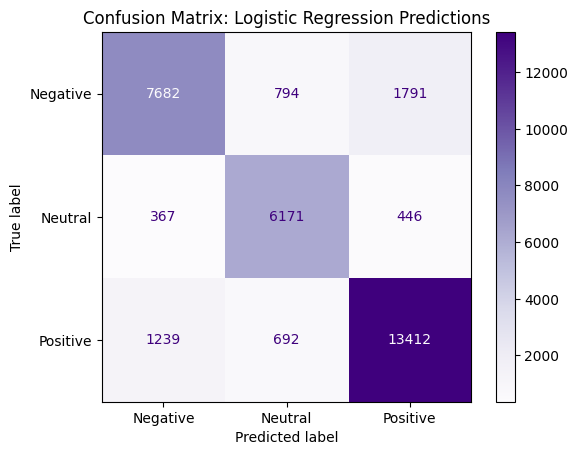

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


vectorizer = TfidfVectorizer(max_features=3000)  # You can tune max_features
X = vectorizer.fit_transform(df_vader['processed_text'])
y = df_vader['predicted_sentiment']  # Target from VADER


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: Logistic Regression Predictions")
plt.show()


**CONCLUSION**

The final conclusion from the X data shows that most of the data shows the positive trend that revelaed by both VADER and ML algorithm Logistic regression with accuracy of 80%. Most users expressed positive or neural opinion.As the model acquires good accuracy the text strongly correlates with the sentimental classes.These might be useful to adjust the strategies accordingly.